# Building a Logistic Regression model to predict whether the bank clients subscribed a term deposit or not 

In [160]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Read the Dataset

In [161]:
#Reading the Dataset

df=pd.read_csv(r'C:\Users\aravi\OneDrive\Desktop\ExcelR Assignments\06. Logistics Regression\bank-full_Modified.csv')

In [162]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,1,0,unknown,no


## Exploratory Data Analysis

**Lets Explore the data**

In [163]:
#Checking for Missing Values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [164]:
df.info

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  d

In [165]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### Create a histogram of the Age

<AxesSubplot:ylabel='Frequency'>

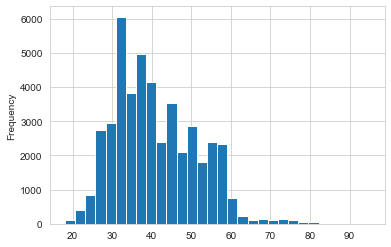

In [199]:
df['age'].plot.hist(bins=30)

<AxesSubplot:>

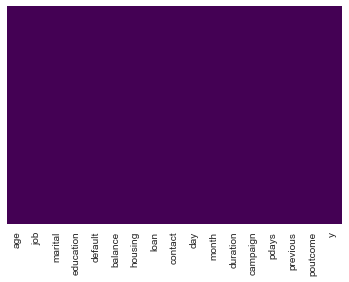

In [200]:
#Missig Values representation on heatmap
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [167]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='y', ylabel='count'>

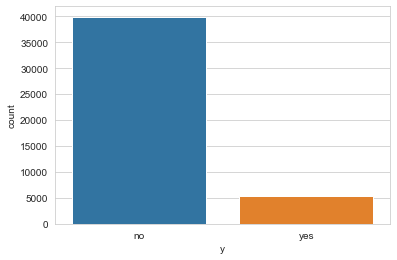

In [168]:
sns.countplot(df['y'], data=df)

<AxesSubplot:xlabel='y', ylabel='count'>

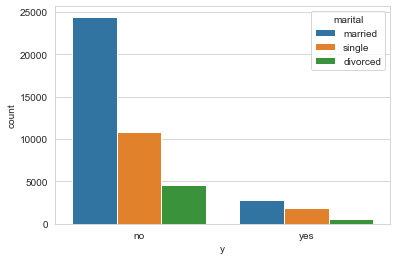

In [169]:
sns.countplot(df['y'],hue='marital', data=df)

<AxesSubplot:xlabel='y', ylabel='count'>

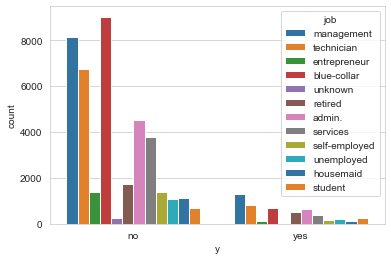

In [170]:
sns.countplot(df['y'], hue='job', data=df, palette='tab10')

In [171]:
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

count     45211
unique        2
top         yes
freq      25130
Name: housing, dtype: object


<AxesSubplot:xlabel='y', ylabel='count'>

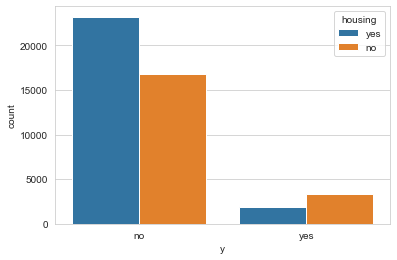

In [172]:
print(df['housing'].describe())
sns.countplot(x=df['y'],hue='housing', data=df)

<AxesSubplot:>

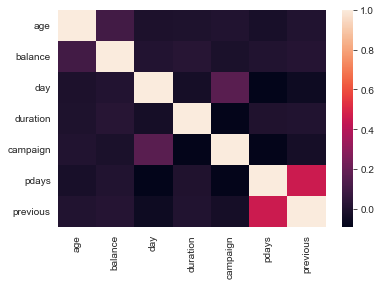

In [173]:
sns.heatmap(df.corr())

# Transforming the Categorical Variables by Using Label Encoder

In [174]:
# Label Encoding for Categorical Variables

from sklearn.preprocessing import LabelEncoder

df1=df.apply(LabelEncoder().fit_transform)

In [175]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,2122,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,29,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,2,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,1504,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,1,0,0,2,4,8,198,0,0,0,3,0


In [176]:
# Defining X and Y variables

X=df1.iloc[:, :-1]
Y=df1.iloc[: , -1]

In [177]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,40,4,1,2,0,2122,1,0,2,4,8,261,0,0,0,3
1,26,9,2,1,0,29,1,0,2,4,8,151,0,0,0,3
2,15,2,1,1,0,2,1,1,2,4,8,76,0,0,0,3
3,29,1,1,3,0,1504,1,0,2,4,8,92,0,0,0,3
4,15,11,2,3,0,1,0,0,2,4,8,198,0,0,0,3


In [178]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

# Split Data set for Training & Testing

In [179]:
from sklearn.model_selection import train_test_split

#Split Data
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.20, random_state=42)

In [180]:
from sklearn.linear_model import LogisticRegression

In [181]:
model=LogisticRegression()

In [182]:
model

LogisticRegression()

In [183]:
model.fit(X_train,y_train)

LogisticRegression()

In [184]:
model.score(X_train,y_train)

0.8865571776155717

In [185]:
y_predictions=model.predict(X_test)

In [186]:
ActualvsPred={'y_predicted':model.predict(X_test), 'Actual': y_test }
Result=pd.DataFrame(ActualvsPred)
Result

,y_predicted,Actual
3776,0,0
9928,0,0
33409,0,0
31885,0,0
15738,0,0
...,...,...
13353,0,0
38732,0,1
5654,0,0
3779,0,0


In [187]:
Result['CorrectPred']=Result['y_predicted']==Result['Actual']
Result

,y_predicted,Actual,CorrectPred
3776,0,0,True
9928,0,0,True
33409,0,0,True
31885,0,0,True
15738,0,0,True
...,...,...,...
13353,0,0,True
38732,0,1,False
5654,0,0,True
3779,0,0,True


In [188]:
from sklearn.metrics import classification_report

In [189]:
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.53      0.17      0.26      1091

    accuracy                           0.88      9043
   macro avg       0.71      0.57      0.60      9043
weighted avg       0.85      0.88      0.85      9043



# Confusion Matrix

In [190]:
from sklearn.metrics import confusion_matrix

In [191]:
print(confusion_matrix(y_test,y_predictions))

[[7789  163]
 [ 906  185]]


# ROC Curve

Text(0, 0.5, 'True Positive Rate')

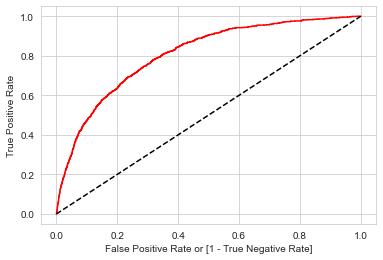

In [195]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

logistic_fpr, logistic_tpr, threshold=roc_curve(y_test,model.predict_proba(X_test)[:,1])

auc=roc_auc_score(y_test, y_predictions)
auc

import matplotlib.pyplot as plt
plt.plot(logistic_fpr, logistic_tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [196]:
auc

0.5745356073194438